In [147]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
L = 271
A = 4    #size of alphabet
alphabet = range(A)

n_iters = 10**2

#For a given k value, generate curves of the probability P(n, k, A, L) of getting n mutations in the same locus. 

n_2 = 2
n_3 = 3

#k = 300
c_results = []
#c_results_lists = []
n_results = {}
for k in range(1, (A-1)*L+1):
    print(k)
    
    P = {2: [], 3:[]}
    for i in range(n_iters):
        sequence = {j:0 for j in range(L)} #This creates a dict to count mutations in each locus

        for mut in range(k):
            locus = rd.randint(0, L-1)
            while(sequence[locus]>=A-1):
                locus = rd.randint(0, L-1)
            sequence[locus] +=1

        #Transform the mutations per site in array
        a = np.array(list(sequence.values()))   

        P[2].append(a[a==n_2].shape[0])
        P[3].append(a[a==n_3].shape[0])
    if k<2:
        C_list = np.array([0 for n_2 in P[2] for n_3 in P[3]])
    else:
        C_list = np.array([(n_2 + 3*n_3)/(k*(k-1)/2) for n_2 in P[2] for n_3 in P[3]])
    c_results.append([C_list.mean(), C_list.std()])  
    #c_results_lists.append(C_list)
    n_results[k] = P

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [153]:
params = {k: c_results_lists[i] for i,k in enumerate(range(2,(A-1)*L))}


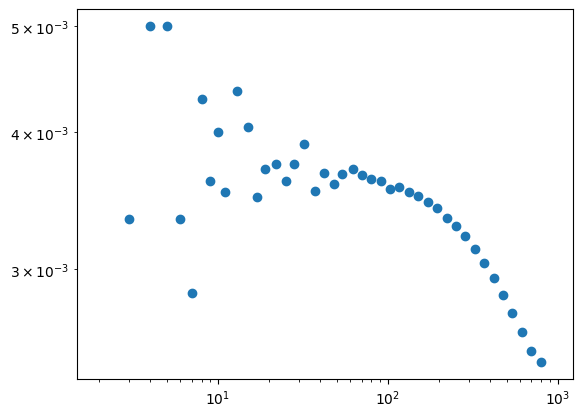

In [154]:
x_smp = np.arange(2,(A-1)*L)

heights, bins, widths = histogramDegrees(x_smp)
k_ = bins[:-1]
Ck_bin = histogramClustCoeffKnnAlternative(params, bins, widths)

plt.scatter(k_, Ck_bin)

x_aster = np.logspace(0, 10, base=2)
y_aster = x_aster**(-1.5)
#plt.scatter(x_aster, y_aster)

plt.yscale('log')
plt.xscale('log')

In [181]:
n_mean = {}
for n_desired in [2,3]:
    vals = []
    n_mean[n_desired] = {}
    for k in range(1, (A-1)*L+1):
        
        x=np.array(n_results[k][n_desired])
        mean2 = x.mean()
        vals.append(mean2)
        n_mean[n_desired][k] = mean2
    #plt.plot(np.arange(1, (A-1)*L)+1, vals, label=f'n={n_desired}')
#plt.plot(np.arange(1, (A-1)*L)+1, [L for j in np.arange(1, (A-1)*L+1)], '--', c='black')
#plt.plot([(A-1)*L for j in range(L)], range(L), '--', c='black')
#plt.ylabel(f'mean number of loci with n neighbors')
#plt.xlabel('degree of the sequence')
#plt.legend(loc='best')
#plt.yscale('log')
#plt.xscale('log')

In [183]:
#N_nodes = 10**5
x_min = 2
alpha = 2.5

#r = np.random.rand(N_nodes)
#x_smp = x_min * (1 - r) ** (-1 / (alpha - 1))
#x_smp = x_smp.astype(int)
#np.place(x_smp, x_smp>=(A-1)*L, (A-1)*L-1)

c_values = []

df = pd.read_csv('./neighbors_GrandNetwork.csv')
x_smp = np.array(df['degree'].tolist())

rho = 0

for i, node in enumerate(x_smp):
    if i%10**5 == 0:
        print(i)
    k = node   #degree
    #Need to include the condition that
    n2 = n_mean[2][k] #np.random.choice(n_results[k][2])
    n3 = n_mean[3][k] #np.random.choice(n_results[k][3])
    #while(2*n2+3*n3>k and n2+n3>=L):
    #    print('breaking', 2*n2+3*n3, k)
    #    n2 = np.random.choice(n_results[k][2])
    #    n3 = np.random.choice(n_results[k][3])
    #r = rd.random()
    #if r < rho:
    #    if n2:
    #        n2 = int(n2*(1-r))
    #    elif n3:
    #        n3 = int(n3*(1-r))
    
    
    c_values.append((n2 + 3*n3)/(k*(k-1)/2))

0
100000
200000
300000


/tmp/ipykernel_8496/2349712606.py:36: RuntimeWarning: invalid value encountered in double_scalars
  c_values.append((n2 + 3*n3)/(k*(k-1)/2))


400000
500000
600000
700000
800000
900000
1000000


In [184]:

def histogramClustCoeffKnnAlternative(parameterDict, bins, widths):
        """
        Function that performs a logarithmic binning over the nodes of a network by
        building a histogram and normalizing each bin by its width. Beware! 
This functions
        only works for C(k) and Knn(k).
        Inputs:
                parameterDict: dictionary whose keys are degrees and values are 
lists of C(k) or Knn(k)
                                k: [C_k_1, C_k_2, C_k_3]  -> k: [0, 0.33, 0.5]  ...
                bins: array of ints containing the intervals for all bins. The 
intervals are discrete.
                widts: array of ints: containing the width of each interval.
        Outputs:
                histogram_norm: array of floats containing all the data points that 
falls on a given bin. The array has been
                normalized by dividing each bin by its width.
        """

        # Declare some variables
        #print('alternative histogram')
        histogram = []

        # Iterate over the bins
        for i in range(bins.shape[0] - 1):
                # The intervals
                minDegree = bins[i]
                # -1 since the right extreme of the interval is not taken into 
                #account and degrees are ints
                maxDegree = bins[i + 1] - 1

                #print("minDegree", minDegree, "maxDegree", maxDegree)

                # Count all nodes that fall in the interval
                if minDegree == maxDegree:
                        # Sum the parameter of all the point in the current interval
                        suma = 0

                        #print("\tsumaa", suma)
                        for paramPoint in parameterDict[minDegree]:
                                suma += paramPoint
                        # Count the number of nodes at the current interval
                        n = len(parameterDict[minDegree])
                        histogram.append(suma/n)

                else:
                        count = 0
                        suma = 0
                        # In case the interval comprises more than one degree
                        #print("interval comprises more than one degree\n")
                        for j in range(minDegree, maxDegree + 1):
                                #  Check if the degree exists
                                if j in parameterDict.keys():
                                        #print("\tCheck the degree in interval", i)
                                        # Count the number of nodes at the current interval
                                        count += len(parameterDict[j])
                                        #print("counttt", count, "degree", i)
                                        # Sum the parameter of all the point in the current interval
                                        #suma += parameterDict[j]
                                        for paramPoint in parameterDict[j]:
                                                suma += paramPoint


                        # In case no points fall in the interval
                        #print("\tsumaa", suma)
                        if suma == 0:
                                histogram.append(0)
                        else:
                                histogram.append(suma/count)

        # Normalize histogram
        histogram_norm = np.array(histogram)#/widths

        return histogram_norm

def histogramDegrees(degrees, minDegreeInterval = 1,maxDegreeInterval = 10, base = 2.0):
    """
    Function that performs a logarithmic binning for the degrees in a network 
    Inputs:
        degrees: array of ints containing the degrees of a network 
        minDegreeInterval: int indicating the minimum degree to create the binning intervals
            Beware! this depends on the base because minDegree = base^minDegreeInterval
        maxDegreeInterval: int indicating the maximum degree to create the binning intervals
            Beware! this depends on the base because maxDegree = base^maxDegreeInterval 
        base: int/float indicating the base for the logarithmic binning
    Outputs:
        histogram_norm: array of floats containing all the data points that falls on a given bin. The array has been
        normalized by dividing each bin by its width
        binsUnique: array of ints (since intervals are discrete) containing the intervals of all bins 
        width: array of ints/floats containing the width of each interval 
    """

    # Create array of bins
    bins = np.logspace(minDegreeInterval, maxDegreeInterval, base = base, dtype = int)

    # Get the unique bins
    binsUnique = np.unique(bins)
    # Get the widths of each interval
    widths = (binsUnique[1:] - binsUnique[:-1])
    # Get the histogram
    histogram = np.histogram(degrees, bins = binsUnique)

    # Normalize bins by width 
    histogram_temp = histogram[0]/widths

    # Normalize again by the number of nodes in the network, so we have a probability distribution
    histogram_norm = histogram_temp/degrees.shape[0]

    return histogram_norm, binsUnique, widths

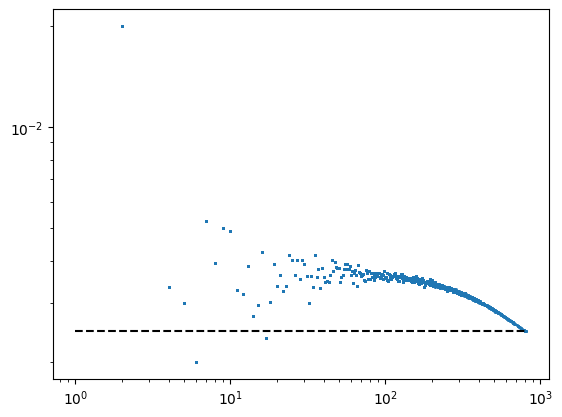

In [185]:
plt.scatter(x_smp, c_values, s=1)
plt.xscale('log')
plt.yscale('log')
x = np.linspace(min(x_smp), max(x_smp), N_nodes)  # Adjust the range as needed


plt.plot(np.arange(1,(A-1)*L-1), [(A-2)/(L*(A-1)-1) for i in np.arange(1,(A-1)*L-1)], '--', c='black')

# Calculate y values based on the power law with exponent 1.5
beta = 1.5
y = (beta-1)/x_min*(x / x_min) ** (-beta)
#plt.scatter(x,y, s=1)

In [186]:
pk = {}

for k in range(1,(A-1)*L+1):
    pk[k] = []
    
for i,element in enumerate(x_smp):
    pk[element].append(c_values[i])


In [187]:
#Sort params
params = pk #{x_smp[i]: c_values[i] for i in range(len(x_smp))}

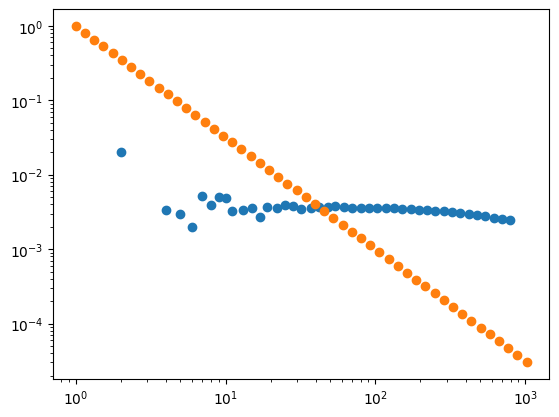

In [189]:
heights, bins, widths = histogramDegrees(x_smp)
k_ = bins[:-1]
Ck_bin = histogramClustCoeffKnnAlternative(params, bins, widths)

plt.scatter(k_, Ck_bin)

x_aster = np.logspace(0, 10, base=2)
y_aster = x_aster**(-1.5)
plt.scatter(x_aster, y_aster)

plt.yscale('log')
plt.xscale('log')